# Fig3

## motif logo

In [1761]:
motif_logo <- data.frame(A = c(0.244,0.473,0.001,0.001,0.997,0.051,0.021,0.024,0.997,0.050,0.210,0.241),
          C = c(0.149,0.218,0.001,0.001,0.001,0.462,0.001,0.974,0.001,0.258,0.394,0.319),
          G = c(0.396,0.268,0.001,0.991,0.001,0.440,0.001,0.001,0.001,0.227,0.153,0.211),
          T = c(0.211,0.041,0.997,0.007,0.001,0.047,0.977,0.001,0.001,0.465,0.243,0.229))
motif_logo <- t(motif_logo)

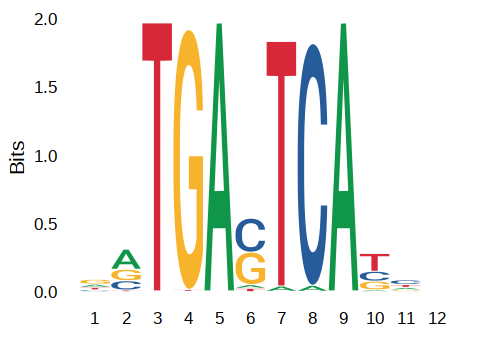

In [2074]:
options(repr.plot.width = 4,repr.plot.height = 3)
ggseqlogo::ggseqlogo(motif_logo)

In [1775]:
pdf("/home/minghao/workbase/16_Tilapia_Cold_BulkRNA-ATAC_jiaohe/output/plot/Jun-AP1(bZIP)_motif_logo.pdf",width = 4,height = 3)
ggseqlogo::ggseqlogo(motif_logo)
dev.off()

png 
  2

## bar plot

In [ ]:
TPM <- read.delim("/home/zhangdeyin/cjb/jiaohe/0.RNA/RNA-Seq_tpm_countstable.xls",sep = "\t")
TPM <- TPM[,grep(colnames(TPM),pattern = "SP",invert = T)]

In [1785]:
fig3_gene <- c("ENSONIG00000012753","ENSONIG00000011785","ENSONIG00000006597",
               "ENSONIG00000005362","ENSONIG00000036571","ENSONIG00000018962",
              "ENSONIG00000019745")
fig3_gene <- data.frame(Gene_Id = fig3_gene,
                       gene = c("MTMR4","traf3","FTL","MAP2K6","fosab","TP53","mapk8b"))

In [1790]:
fig3_gene_TPM <- TPM %>% inner_join(fig3_gene,by = "Gene_Id")

In [1799]:
fig3_gene_TPM <- reshape2::melt(fig3_gene_TPM,id.vars = c("Gene_Id","gene"))

In [1803]:
fig3_gene_TPM$group <- gsub("[0-9]","",fig3_gene_TPM$variable)
fig3_gene_TPM$group <- factor(fig3_gene_TPM$group,levels = c("Ctrl_HK","Cold_HK","Ctrl_TH","Cold_TH"))
fig3_gene_TPM$gene <- tolower(fig3_gene_TPM$gene)

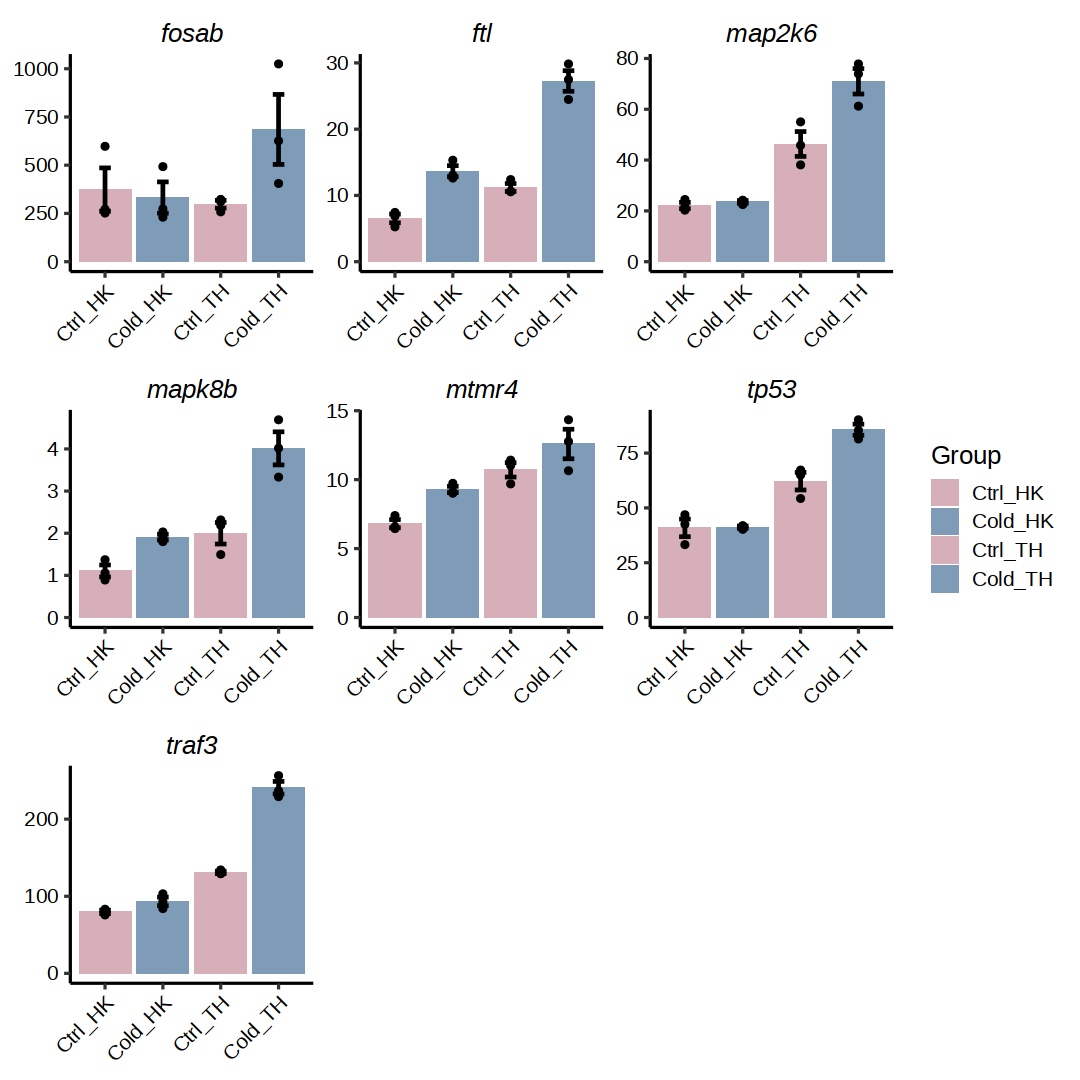

In [1833]:
options(repr.plot.width = 9,repr.plot.height = 9)
ggplot(fig3_gene_TPM,aes(x = group , y = value ,fill = group)) + 
    geom_bar(stat = "summary",fun=mean) + 
    geom_errorbar(stat = "summary", fun.data = mean_se, width = 0.2, color = "black",size = 1)+
    geom_point(show.legend = F) + 
    scale_fill_manual(values = c("#D6AFB9","#7E9BB7","#D6AFB9","#7E9BB7")) +
    facet_wrap(~gene,ncol = 3,scales = "free") + 
    labs(fill = "Group" , y = NULL,x = NULL) + 
    theme_classic(base_size = 15) + 
    theme(axis.text.y = element_text(colour = "black"),
          axis.text.x = element_text(angle = 45,hjust = 1,colour = "black"),
          strip.text = element_text(size = 15,colour = "black",face = "italic"),
          strip.background = element_rect(color = "white")
         )

In [1834]:
pdf("/home/minghao/workbase/16_Tilapia_Cold_BulkRNA-ATAC_jiaohe/output/plot/Fig3_barplot.pdf",width = 9,height = 9)
ggplot(fig3_gene_TPM,aes(x = group , y = value ,fill = group)) + 
    geom_bar(stat = "summary",fun=mean) + 
    geom_errorbar(stat = "summary", fun.data = mean_se, width = 0.2, color = "black",size = 1)+
    geom_point(show.legend = F) + 
    scale_fill_manual(values = c("#D6AFB9","#7E9BB7","#D6AFB9","#7E9BB7")) +
    facet_wrap(~gene,ncol = 3,scales = "free") + 
    labs(fill = "Group" , y = NULL,x = NULL) + 
    theme_classic(base_size = 15) + 
    theme(axis.text.y = element_text(colour = "black"),
          axis.text.x = element_text(angle = 45,hjust = 1,colour = "black"),
          strip.text = element_text(size = 15,colour = "black",face = "italic"),
          strip.background = element_rect(color = "white")
         )
dev.off()

png 
  2

## AP1-JUN Enrichment

In [ ]:
merge_10_motif_result3 <- readRDS("/home/minghao/workbase/16_Tilapia_Cold_BulkRNA-ATAC_jiaohe/Motif_Enrich/output/DEPeaks_select_merge_10_motif_result_v3.rds")

In [2168]:
AP1_JUN <- merge_10_motif_result3[merge_10_motif_result3[,8] != "",] %>% .$RNA_gene

In [2175]:
AP1_JUN_go <- enrichment_stat_go(bl = rownames(BulkRNA_df),il = AP1_JUN)
AP1_JUN_kegg <- enrichment_stat_kegg(bl = rownames(BulkRNA_df),il = AP1_JUN)

In [2176]:
openxlsx::write.xlsx(list(GO = AP1_JUN_go,KEGG = AP1_JUN_kegg),
                     "/home/minghao/workbase/16_Tilapia_Cold_BulkRNA-ATAC_jiaohe/output/RNA&ATAC_output/20240312_AP1-JUN_enrichment.xlsx")

In [2183]:
length(unique(AP1_JUN))

[1] 672

In [2429]:
select_AP1_ko <- c("ko04668","ko04920","ko04624","ko04659","ko04010","ko04137","ko04620","ko04140","ko04066","ko04658","ko04210",
                  "ko04657","ko04216")
data <- AP1_JUN_kegg[AP1_JUN_kegg$kegg %in% select_AP1_ko,]

In [2430]:
data$Description <- factor(data$Description,levels = rev(as.character(data$Description)))

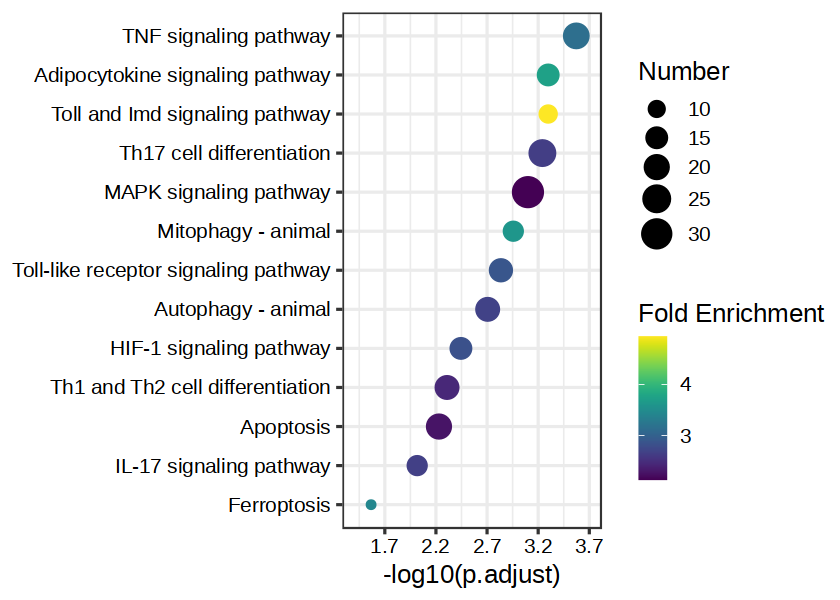

In [2438]:
options(repr.plot.width = 7,repr.plot.height = 5)
ggplot(data,aes(x = -log10(p.adjust),y = Description,color = fold,size = x)) + 
    geom_point() + 
    viridis::scale_color_viridis(option = "D",breaks = c(2,3,4,5))+ 
    scale_size_continuous(range = c(2,8)) +
    scale_x_continuous(breaks = c(1.2,1.7,2.2,2.7,3.2,3.7),limits = c(1.4,3.7)) +
    theme_bw(base_size = 15) + 
    labs(color = "Fold Enrichment",size = "Number",y = NULL) + 
    theme(axis.text = element_text(color = "black"))

In [2439]:
pdf("/home/minghao/workbase/16_Tilapia_Cold_BulkRNA-ATAC_jiaohe/output/plot/Fig3_KEGG_dotplot.pdf",width = 7,height = 5)
options(repr.plot.width = 7,repr.plot.height = 5)
ggplot(data,aes(x = -log10(p.adjust),y = Description,color = fold,size = x)) + 
    geom_point() + 
    viridis::scale_color_viridis(option = "D",breaks = c(2,3,4,5))+ 
    scale_size_continuous(range = c(2,8)) +
    scale_x_continuous(breaks = c(1.2,1.7,2.2,2.7,3.2,3.7),limits = c(1.4,3.7)) +
    theme_bw(base_size = 15) + 
    labs(color = "Fold Enrichment",size = "Number",y = NULL) + 
    theme(axis.text = element_text(color = "black"))
dev.off()

png 
  2

## heatmap

In [7]:
library(dplyr)

In [11]:
cluster_gene2 <- openxlsx::read.xlsx("/home/minghao/workbase_jinagbo/Heatmap_clustergenes.xlsx") %>% dplyr::select(1,2) %>% unique
table(cluster_gene2$cluster)


   1    2    3 
3611 3317  932 

In [2338]:
AP1_JUN <- unique(AP1_JUN)
AP1_JUN_cluster <- cluster_gene2[cluster_gene2$gene %in% AP1_JUN,]
AP1_JUN_cluster$cluster <- factor(AP1_JUN_cluster$cluster,levels = c("1","2","3"))
table(AP1_JUN_cluster$cluster)


  1   2   3 
185 412  75 

In [2332]:
temp <- readRDS("/home/minghao/workbase/16_Tilapia_Cold_BulkRNA-ATAC_jiaohe/output/Bulk_RNA_output/20240308_ZMH_Fig1_Heatmap_matrix.rds")
Heatmap_data <- temp[AP1_JUN_cluster$gene,]

In [2341]:
AP1_JUN_cluster$cluster <- factor(AP1_JUN_cluster$cluster,labels = c("C1\n(185)","C2\n(412)","C3\n(75)"))

In [2379]:
heatmap_label <- data.frame(gene = c("ENSONIG00000012753","ENSONIG00000011785","ENSONIG00000006597",
                           "ENSONIG00000005362","ENSONIG00000036571","ENSONIG00000018962",
                           "ENSONIG00000019745"),
                    name = c("MTMR4","traf3","FTL","MAP2K6","fosab","TP53","mapk8b"))
row_ha <- rowAnnotation(link = anno_mark(at = which(rownames(Heatmap_data) %in% heatmap_label$gene), 
                                         labels = heatmap_label$name, labels_gp = gpar(fontsize = 10)))

In [2380]:
AP1_heatmap <- Heatmap(Heatmap_data,cluster_rows = FALSE,
                       right_annotation = row_ha,
        #row_order = match(rownames(Heatmap_data),rev(AP1_JUN_cluster$gene) ),
        cluster_row_slices = FALSE,
        col = colorRampPalette(c("#1C86EE","white","#FF4500"))(100),
        cluster_columns = F,   
        clustering_distance_rows = function(m) dist(m),
        clustering_method_rows = "ward.D2",
        use_raster = TRUE,
        border = TRUE,
        row_split = AP1_JUN_cluster$cluster,
        column_split = factor( rep(c("HK","TH"), each = 6)),
        heatmap_legend_param = list(
             title='Z score',
             title_gp = gpar(fontsize = 14),
             labels_gp = gpar(fontsize = 14),
             border='black'),
        show_row_names = FALSE,
        #width = unit(10, "cm"),
        #height = unit(16, "cm"),
        show_column_dend = FALSE,
        column_names_rot = 45)

'magick' package is suggested to install to give better rasterization.

Set `ht_opt$message = FALSE` to turn off this message.



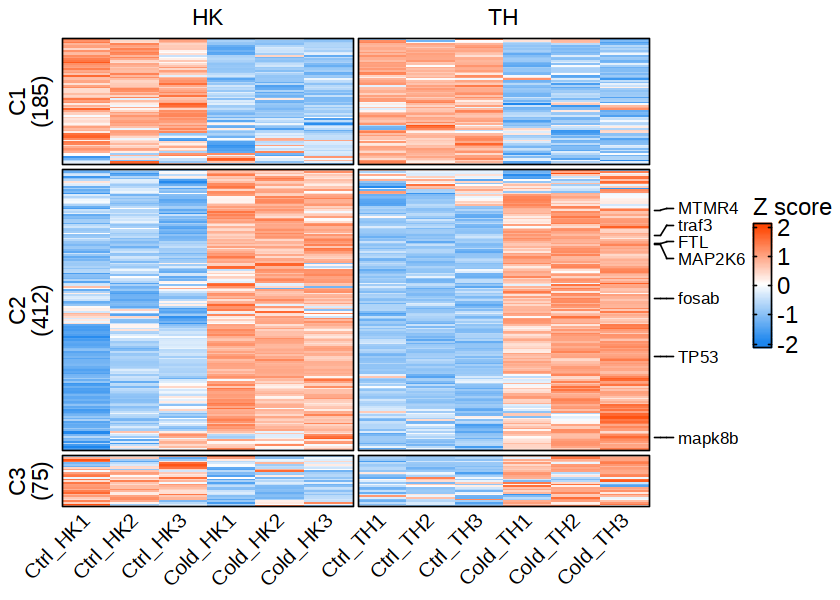

In [2381]:
AP1_heatmap

In [2383]:
pdf("/home/minghao/workbase/16_Tilapia_Cold_BulkRNA-ATAC_jiaohe/output/plot/Fig3_AP1_targetgene_heatmap.pdf",width = 4.5,height = 5)
AP1_heatmap
dev.off()

png 
  2